# Initial Analysis - Feature Selection Project
- Initial tasks and notes for the project
- To run, save the data locally in the following paths

In [1]:
label_file_path = r"c:/data/sampleinfo_SCANB_t.csv"
feature_file_path = r"c:\data\SCANB.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
label_df = pd.read_csv(label_file_path)
feature_df = pd.read_csv(feature_file_path)

# Labels

In [3]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3069 non-null   int64  
 1   samplename  3069 non-null   object 
 2   ER          3069 non-null   int64  
 3   PAM50       3069 non-null   object 
 4   time        3069 non-null   int64  
 5   event       3069 non-null   int64  
 6   Lympho      3069 non-null   float64
 7   cluster2    3069 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 191.9+ KB


In [4]:
label_df.head()

,Unnamed: 0,samplename,ER,PAM50,time,event,Lympho,cluster2
0,1,F1,1,Basal,2367,0,2.602223,6
1,2,F2,2,LumA,2367,0,1.104544,5
2,3,F3,2,LumB,2168,1,0.581018,5
3,4,F4,2,LumA,2416,0,2.882004,6
4,5,F5,2,Normal,2389,0,1.013356,4


# Features

In [5]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Columns: 3070 entries, Unnamed: 0 to F3135repl
dtypes: float64(3069), object(1)
memory usage: 217.0+ MB


In [6]:
feature_df.head()

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F9,F10,F11,...,F2841repl,F2860repl,F2872repl,F2877repl,F2911repl,F2912repl,F2958repl,F3057repl,F3085repl,F3135repl
0,A2M,-1.098234,0.110096,-1.779393,0.268360,0.616851,3.433406,-0.424064,0.357813,0.629575,...,0.340017,-0.427134,-0.811695,1.155090,-0.873224,-0.186538,-0.071234,1.535495,-2.769459,1.348425
1,A4GNT,-0.615048,-0.615048,-0.615048,-0.615048,-0.615048,-0.615048,-0.615048,-0.615048,3.324828,...,2.004878,0.408918,-0.615048,2.120522,-0.615048,2.274780,0.598461,1.185567,-0.615048,-0.615048
2,AAAS,-1.670827,0.248934,-0.422635,0.236302,-0.988261,-1.263231,-2.147768,-1.700644,0.055263,...,-0.807723,-1.566462,1.859718,-1.240860,1.058475,-0.234717,-0.501922,0.165044,0.883363,-1.641798
3,AACS,-0.539020,0.032084,0.392158,0.563540,-0.083663,-0.748093,-0.999103,-1.358139,2.157231,...,0.241122,-0.216516,0.841555,-1.019500,-0.108282,0.508552,0.663004,-0.257163,-0.884103,0.819606
4,AADAC,0.098325,0.262344,-0.711190,-0.373168,0.067739,-0.711190,-0.711190,-0.183505,-0.021691,...,-0.711190,2.818603,-0.711190,-0.711190,-0.711190,-0.711190,-0.711190,-0.711190,-0.056693,-0.711190


## Kickoff 2023/04/19
### Project goals
Perform regression on Lympho, and classification on ER

Start by doing disjointification: Begin using a single feature and gradually add the lesser and lesser significant ones, of those least correlated to the current ones, ordered by some score.

### Regression
For regression, the score can be the correlation between features and between feature and target.
Rank the features from highest to lowest and start inserting. Theoretically all features can be gradually inserted, but each itteration will take longer due to more correlation calculations.
Decide in advance for a stopping critterion - Time of itteration or total number of features (Hundreds - at least 500)
SO:
- rank by (abs) target correlation
- insert the first feature always
- subsequent features enter if they are below a threhold (hyper parameter) correlation with all previous features

### Classification
- Similar, but use abs WRS (or p-value) as the target score instead of abs correlation 
- Thresholding by 

### Preliminary - Data exploration
- EDA
- Consider rejecting very low varying features
- Play around with the data and describe/visualize it

### After this first stage (two weeks)
- Current algorithm is coarse but can help rejecting lowest ranking features
- We'll improve the data, pipeline and code with wrappers, embedded / genetic algorithms
- If computation resources become an issue, raise it and there'll be resources provided

## EDA

In [7]:
feature_means = feature_df.mean(numeric_only=True)
feature_standard_devs = feature_df.std(numeric_only=True)

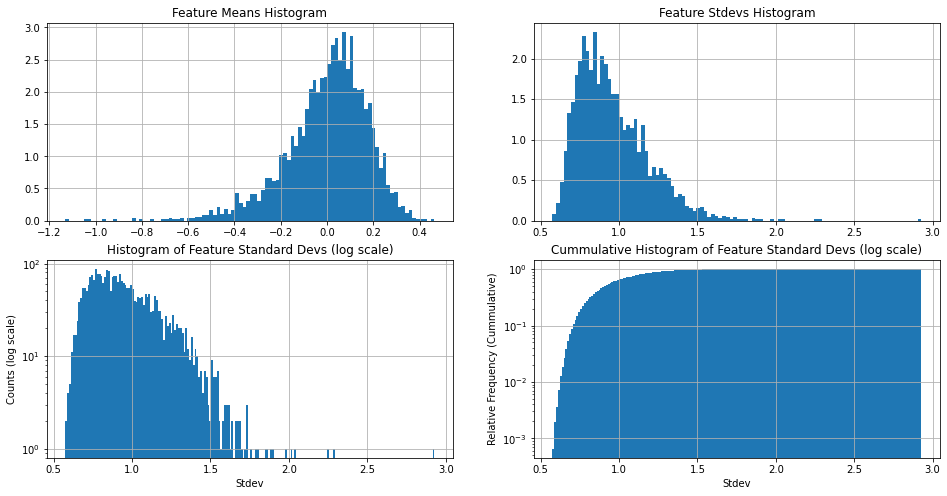

In [8]:
fig, axs = plt.subplots(2,2,figsize=(16,8))

ax = axs.flatten()[0]
feature_means.hist(bins=100, ax = ax, density=True)
ax.set_title("Feature Means Histogram")

ax = axs.flatten()[1]
ax.set_title("Feature Stdevs Histogram")
feature_standard_devs.hist(bins=100, ax=ax, density=True)

ax = axs.flatten()[2]
ax.hist(feature_standard_devs, bins=200, cumulative=False, log="True")
ax.set_title("Histogram of Feature Standard Devs (log scale)")
ax.set(xlabel="Stdev", ylabel="Counts (log scale)")

ax = axs.flatten()[3]
ax.hist(feature_standard_devs, bins=200, cumulative=True, density=True, log=True)
ax.set_title("Cummulative Histogram of Feature Standard Devs (log scale)")
ax.set(xlabel="Stdev", ylabel="Relative Frequency (Cummulative)")

for ax in axs.flatten():
    ax.grid('minor')

plt.show()

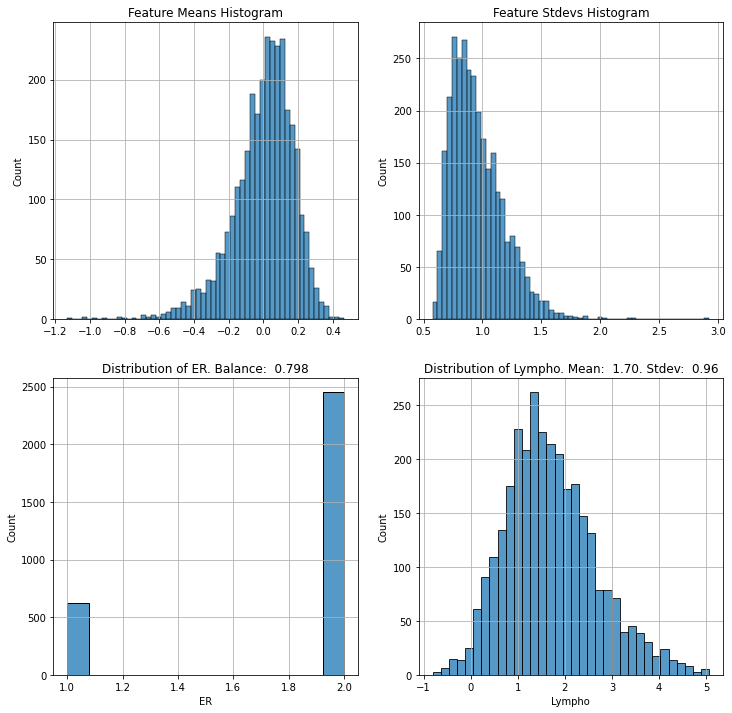

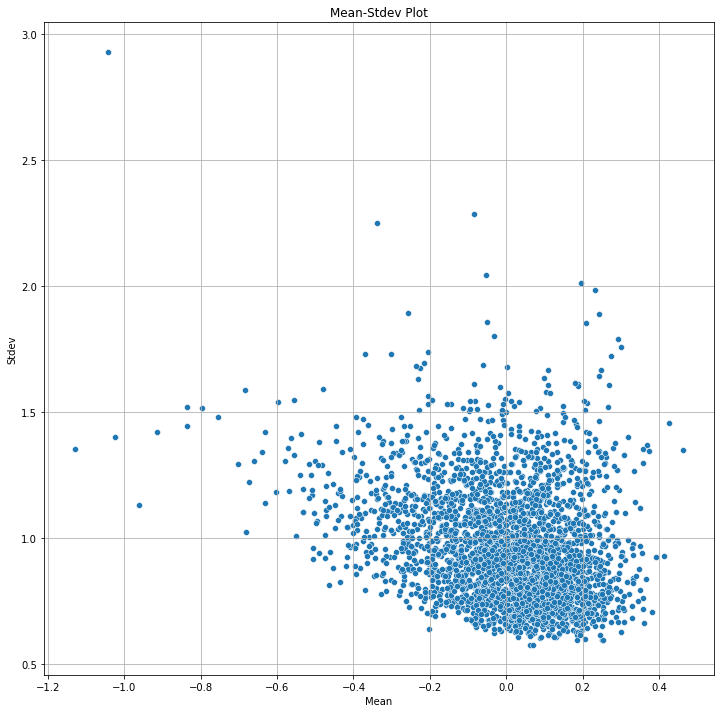

In [9]:
W=12
fig, axs = plt.subplots(2,2,figsize=(W,W))
num_bins=100

ax = axs.flatten()[0]
sns.histplot(feature_means, ax=ax)
ax.set_title("Feature Means Histogram")

ax = axs.flatten()[1]
ax.set_title("Feature Stdevs Histogram")
sns.histplot(feature_standard_devs, ax=ax)

num_bins_ER = 2
er_data = label_df["ER"]
er_balance = label_df["ER"].mean()-1

ax = axs.flatten()[2]
sns.histplot(data = label_df, x="ER", ax=ax)
ax.set(title=f"Distribution of ER. Balance: {er_balance: .3f}")

num_bins_lympho = 100
lympho_data = label_df["Lympho"]
lympho_mean = lympho_data.mean()
lympho_stdev = lympho_data.std()
ax = axs.flatten()[3]
sns.histplot(data = label_df, x="Lympho", ax=ax)
ax.set(title=f"Distribution of Lympho. Mean: {lympho_mean: .2f}. Stdev: {lympho_stdev: .2f}")

for ax in axs.flatten():
    ax.grid("minor")

fig, ax = plt.subplots(figsize=(W,W))
sns.scatterplot(x=feature_means, y=feature_standard_devs, ax=ax)
ax.set(title="Mean-Stdev Plot", xlabel="Mean", ylabel="Stdev")
ax.grid("minor")    
